# Housing Price Prediction Model

### Import Libraries

In [90]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

### Read Data from the Dataset

In [91]:
df = pd.read_csv('HousingPriceDataset.csv')
df.head()
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


### Data Explorations

In [92]:
# Check # of columns and rows
df.shape

(545, 13)

In [93]:
# CHeck for each column's data type
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [94]:
# CHeck for null values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

### Data Preprocessing and Cleaning

In [95]:
# # Less assume that bedrooms had a missing value.
# df['bedrooms'].fillna(df['bedrooms'].median(), inplace=True)
# # Check for null values again
# df.isnull().sum()
df.tail()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


### Data Visualizations

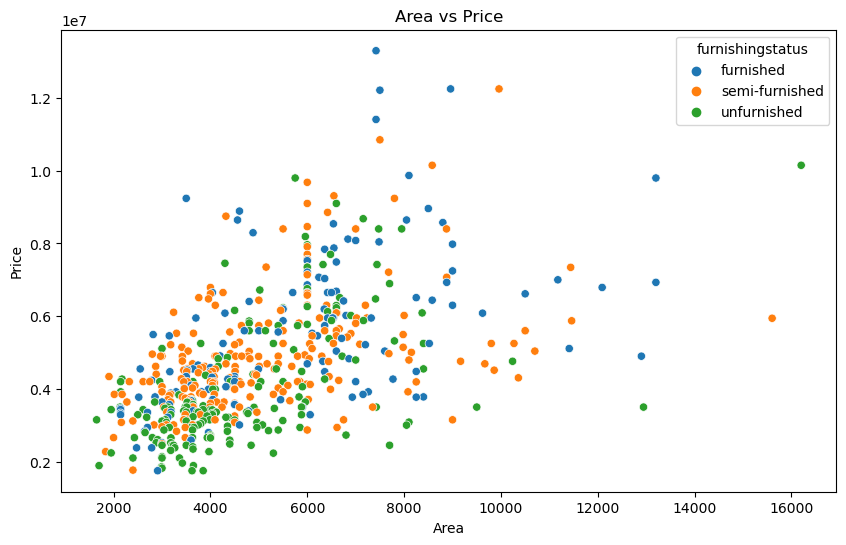

In [96]:
# Compare # nof bredooms vs price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=df, hue='furnishingstatus')
plt.title('Area vs Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

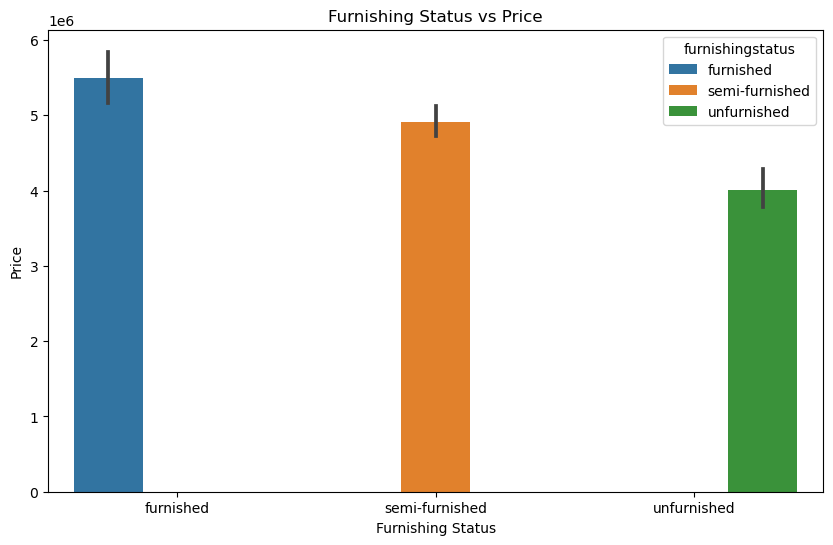

In [97]:
# Compare # of bedrooms vs price
plt.figure(figsize=(10, 6))
sns.barplot(x='furnishingstatus', y='price', data=df, hue='furnishingstatus')
plt.title('Furnishing Status vs Price')
plt.xlabel('Furnishing Status')
plt.ylabel('Price')
plt.show()

## Create a Model

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Split the data into features [X] and target [y] 

In [99]:
# Price is the target value
y = df['price']
# Remove the rest price and assign the rest of the feature columns to X
X = df.drop('price', axis=1)

### Split data into train and test data

In [100]:
### Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Encode the data from categorical features

####  Binary Columns
- Converts categories to binary code, then splits into columns
- Combines benefits of one-hot and label encoding
- Efficient for high-cardinality features
- Columns: mainroad, guestroom, basement, hotwaterheating, airconditioning, prefarea

In [101]:
# Initialize the Binary Encoder
from category_encoders import BinaryEncoder

binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
binary_encoder = BinaryEncoder(cols=binary_columns)
binary_encoder

BinaryEncoder(cols=['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                    'airconditioning', 'prefarea'])

### Ordinal Encoder
- Assigns ordered integer values to categories
- Appropriate for ordinal categorical features with a natural order
- Preserves the inherent ranking of categories

In [102]:
# Initialize Ordinal Encoder
from category_encoders import OrdinalEncoder

ordinal_columns = ['furnishingstatus']
ordinal_encoder = OrdinalEncoder(cols=ordinal_columns, 
                                 mapping=[{'col': 'furnishingstatus', 
                                           'mapping': {'unfurnished':0, 'semi-furnished':1, 'furnished':2}}])
ordinal_encoder

OrdinalEncoder(cols=['furnishingstatus'],
               mapping=[{'col': 'furnishingstatus', 'data_type': dtype('O'),
                         'mapping': unfurnished       0
semi-furnished    1
furnished         2
dtype: int64}])

### Fit and Transform the Binary and Ordinal Data into Train and Test

In [103]:
# Fit binary encoded data into training data
X_train_encoded = binary_encoder.fit_transform(X_train)
# Fit binary and ordinal encoded data into rest of the training data
X_train_encoded = ordinal_encoder.fit_transform(X_train_encoded)

### Transform the Test data

In [104]:
# Transform Binary Data
X_test_encoded = binary_encoder.transform(X_test)
# Transform binary and ordinal encoded data into rest of the test data
X_test_encoded = ordinal_encoder.transform(X_test_encoded)

#### Print the Encoded Test Data Results

In [105]:
print(X_test_encoded.head())

     area  bedrooms  bathrooms  stories  mainroad_0  mainroad_1  guestroom_0  \
316  5900         4          2        2           1           0            0   
77   6500         3          2        3           0           1            0   
360  4040         2          1        1           0           1            0   
90   5000         3          1        2           0           1            0   
493  3960         3          1        1           0           1            0   

     guestroom_1  basement_0  basement_1  hotwaterheating_0  \
316            1           0           1                  0   
77             1           1           0                  0   
360            1           1           0                  0   
90             1           1           0                  0   
493            1           1           0                  0   

     hotwaterheating_1  airconditioning_0  airconditioning_1  parking  \
316                  1                  0                  1       

### Feature Scaling
- Normalize or standardize numerical features to ensure they're on the same scale
- This is particularly important for algorithms sensitive to feature scales, like linear regression or neural networks

In [106]:
from sklearn.preprocessing import StandardScaler

# Initialize the the scaler
scaler = StandardScaler()

# Fit on training data
X_train_scaled = scaler.fit_transform(X_train_encoded)

# Transform test data
X_test_scaled = scaler.transform(X_test_encoded)

### Feature Scaling
- Use techniques like correlation analysis, mutual information, or recursive feature elimination to identify the most relevant features
- This can help reduce noise and improve model performance

In [107]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select the top 10 features
selector = SelectKBest(f_regression, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Get Selected Feature names
selected_features = X_train_encoded.columns[selector.get_support()].tolist()
print("Selected Features: ", selected_features)

Selected Features:  ['area', 'bedrooms', 'bathrooms', 'stories', 'airconditioning_0', 'airconditioning_1', 'parking', 'prefarea_0', 'prefarea_1', 'furnishingstatus']


### Split the Data
- Divide your dataset into training, validation, and test sets
- A common split is 60-20-20 test_size=0.2 or 70-15-15 test_size=0.3

In [108]:
# Re-assign training and testing features and target data
X_train, X_test, y_train, y_test = train_test_split(X_train_selected, y_train, test_size=0.3, random_state=42)

### Choose a Model = Linear Regression

In [109]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
lr_model = LinearRegression()
# fit updated feature and target data to model for training
lr_model.fit(X_train, y_train)
# Make predictions
lr_pred = lr_model.predict(X_test)

### Evaluate the Model

RMSE (Root Mean Square Error) and R2 score serve different purposes and are used in different contexts:
- RMSE is typically used for regression problems. It measures the standard deviation of the residuals (prediction errors). Lower RMSE indicates better fit.

- R2 score (coefficient of determination) represents the proportion of variance in the dependent variable that is predictable from the independent variable(s). It ranges from 0 to 1, with 1 indicating perfect prediction.

- Neither is inherently "better" than the other. They provide different information:
RMSE is in the same units as the target variable, making it interpretable.
R2 score is scale-independent, allowing comparisons across different models.

### Root Mean Squared Error

In [110]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate the mean squared error
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
print("Linear Regression RMSE: ", lr_rmse)

Linear Regression RMSE:  1097008.6387607479


#### Interpreting the root mean squared error RMSE

- Your RMSE is 1,097,008.6387607479. To interpret this:
1. The RMSE is in the same units as your target variable (house prices).
2. It represents the average deviation of predictions from actual values.
3. In this case, on average, your model's predictions are off by about 1,097,008 units (presumably in the currency of your house prices).
- To determine if this RMSE is good:
1. Compare it to the mean or median house price in your dataset.
2. Compare it to the range of house prices.
3. Consider the business context - is this level of error acceptable for your use case?

- For example, if the average house price is 5,000,000, an RMSE of ~1,100,000 might be considered reasonable. However, if the average price is 500,000, this RMSE would indicate poor performance.

### Find the Average House Price (Mean)


In [111]:
average_house_price = df['price'].mean()
print("Average House Price", average_house_price)
print("Linear Regression RMSE: ", lr_rmse)

Average House Price 4766729.247706422
Linear Regression RMSE:  1097008.6387607479


### R squared

#### R-squared:
- R-squared ranges from 0 to 1.
- A value of 1 indicates that the model explains all the variability in the target variable.
- A value of 0 indicates that the model explains none of the variability.
#### Adjusted R-squared:
- This takes into account the number of predictors in your model.
- It adjusts the R-squared value based on the number of predictors, penalizing the addition of irrelevant predictors.
Interpreting your model's accuracy:
- If R-squared is close to 1 (e.g., > 0.8), your model explains a large portion of the variance in the target variable, indicating good accuracy.
- If R-squared is close to 0, your model doesn't explain much of the variance, indicating poor accuracy.
Remember that R-squared should be interpreted alongside other metrics like RMSE:
- RMSE tells you the average deviation of predictions in the original units of the target variable.
- R-squared tells you the proportion of variance explained by the model.

In [112]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, lr_pred)
print("R2 Score: ", r2)

# Calculate Adjusted R-squared
n = len(y_test)  # number of observations
p = X_test.shape[1]  # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared: {adjusted_r2:.4f}")

R2 Score:  0.597876192311753
Adjusted R-squared: 0.5592


Your R-squared value of 0.5979 (or approximately 59.79%) provides important information about your model's performance. Let's interpret this result:

1. Explanation of the R-squared value:
   - This R-squared value means that approximately 59.79% of the variance in the target variable (house prices) is explained by your model.
   - In other words, your linear regression model accounts for about 60% of the variability in house prices using the given features.

2. Interpretation:
   - A value of 0.5979 is in the middle range of possible R-squared values (which go from 0 to 1).
   - This suggests that your model has moderate predictive power.
   - It's capturing a significant portion of the factors that influence house prices, but there's also a considerable amount of unexplained variance.

3. Context:
   - In some fields, an R-squared of 0.60 might be considered quite good, while in others it might be seen as insufficient.
   - For house price prediction, which involves many complex factors, this R-squared value suggests that your model is capturing some important trends, but there's room for improvement.

4. What it means for your model:
   - Your model is definitely better than random guessing or always predicting the mean price.
   - However, about 40% of the variance in house prices is not explained by your current model.

5. Potential implications:
   - There might be other important factors affecting house prices that are not included in your model.
   - The relationship between your features and house prices might not be entirely linear.
   - There could be complex interactions between variables that a simple linear regression isn't capturing.

6. Next steps:
   - Consider feature engineering to create more informative predictors.
   - Try non-linear models (e.g., Random Forests, Gradient Boosting Machines) which might capture more complex relationships.
   - Investigate if there are any important variables you could add to your dataset.
   - Look for potential non-linear relationships or interaction terms.

7. Caution:
   - While aiming for a higher R-squared is generally good, be wary of overfitting. A very high R-squared in your training data that doesn't generalize to new data is not desirable.

### Conclusion:
The R-squared of 0.5979 indicates that the model has moderate predictive power. It's a good starting point, but there's potential for improvement. The model is capturing some important trends in house prices, but there's still a significant portion of the price variation that's not explained by your current features or model structure.